In [1]:
!pip install nltk pandas
print("Libraries installed successfully!")

import nltk
nltk.download('vader_lexicon')
print("VADER lexicon downloaded!")

Libraries installed successfully!
VADER lexicon downloaded!


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
import pandas as pd

data = {
    'comment_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'text_content': [
        "This service is truly exceptional! I'm very satisfied.",
        "It was okay, but not what I expected. A bit underwhelming.",
        "Absolutely terrible experience. I regret buying this.",
        "Great product for the price. Highly recommended to everyone.",
        "The customer support was horrible, but the software itself is quite useful.",
        "Feeling neutral about this. It works, nothing more, nothing less.",
        "What an amazing feature! This changes everything.",
        "Disappointed with the battery life; it drains too quickly.",
        "Very happy with this upgrade. Worth every penny.",
        "This is a complete waste of money. Avoid at all costs!"
    ]
}
df_sentiment = pd.DataFrame(data)

print("Sample text data created successfully:")
print(df_sentiment)

Sample text data created successfully:
   comment_id                                       text_content
0           1  This service is truly exceptional! I'm very sa...
1           2  It was okay, but not what I expected. A bit un...
2           3  Absolutely terrible experience. I regret buyin...
3           4  Great product for the price. Highly recommende...
4           5  The customer support was horrible, but the sof...
5           6  Feeling neutral about this. It works, nothing ...
6           7  What an amazing feature! This changes everything.
7           8  Disappointed with the battery life; it drains ...
8           9   Very happy with this upgrade. Worth every penny.
9          10  This is a complete waste of money. Avoid at al...


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    if pd.isna(text):
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
    return analyzer.polarity_scores(text)

df_sentiment['sentiment_scores'] = df_sentiment['text_content'].apply(get_sentiment_scores)
df_sentiment['negative_score'] = df_sentiment['sentiment_scores'].apply(lambda x: x['neg'])
df_sentiment['neutral_score'] = df_sentiment['sentiment_scores'].apply(lambda x: x['neu'])
df_sentiment['positive_score'] = df_sentiment['sentiment_scores'].apply(lambda x: x['pos'])
df_sentiment['compound_score'] = df_sentiment['sentiment_scores'].apply(lambda x: x['compound'])

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


df_sentiment['sentiment_class'] = df_sentiment['compound_score'].apply(classify_sentiment)

print("\nSentiment Analysis completed. Here are the results:")

print(df_sentiment[['text_content', 'negative_score', 'neutral_score', 'positive_score', 'compound_score', 'sentiment_class']])


Sentiment Analysis completed. Here are the results:
                                        text_content  negative_score  \
0  This service is truly exceptional! I'm very sa...           0.000   
1  It was okay, but not what I expected. A bit un...           0.000   
2  Absolutely terrible experience. I regret buyin...           0.617   
3  Great product for the price. Highly recommende...           0.000   
4  The customer support was horrible, but the sof...           0.129   
5  Feeling neutral about this. It works, nothing ...           0.000   
6  What an amazing feature! This changes everything.           0.000   
7  Disappointed with the battery life; it drains ...           0.279   
8   Very happy with this upgrade. Worth every penny.           0.000   
9  This is a complete waste of money. Avoid at al...           0.398   

   neutral_score  positive_score  compound_score sentiment_class  
0          0.488           0.512          0.7419        Positive  
1          0.847    


--- Understanding Sentiment Patterns & Basic Insights ---

Distribution of Sentiment Classes:
sentiment_class
Positive    7
Negative    3
Name: count, dtype: int64


/tmp/ipython-input-4-640187970.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


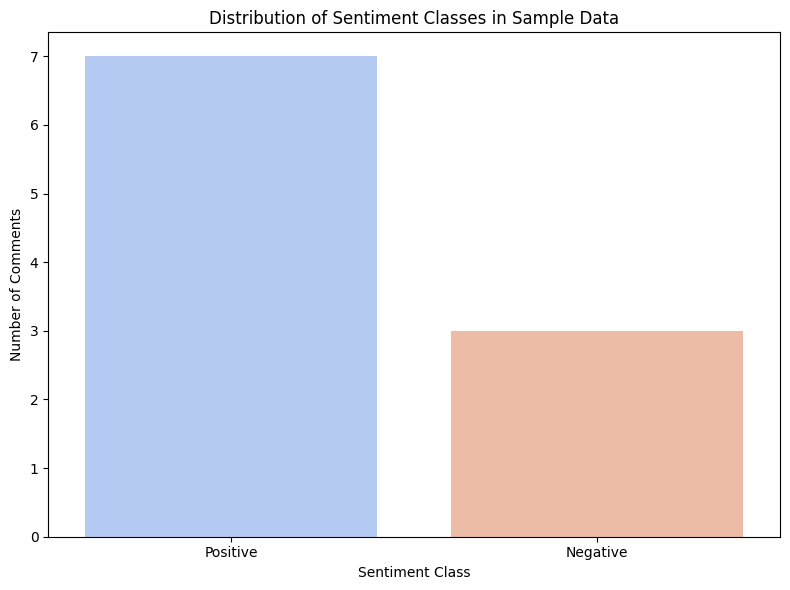

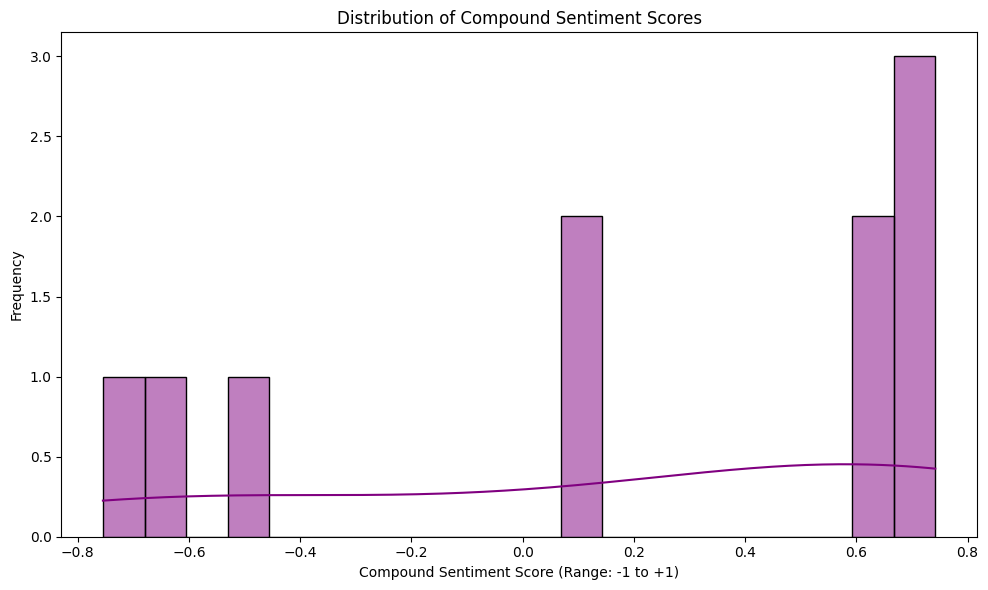


Average Compound Score by Sentiment Class:
sentiment_class
Negative   -0.626367
Positive    0.521529
Name: compound_score, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Understanding Sentiment Patterns & Basic Insights ---")

sentiment_counts = df_sentiment['sentiment_class'].value_counts()
print("\nDistribution of Sentiment Classes:")
print(sentiment_counts)


plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Distribution of Sentiment Classes in Sample Data')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df_sentiment['compound_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score (Range: -1 to +1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nAverage Compound Score by Sentiment Class:")
print(df_sentiment.groupby('sentiment_class')['compound_score'].mean())